# Probabilistic CFG

Until now, you have seen sentences which resulted in a single parse tree. But what if you encounter an ambiguous sentence and grammar which could lead to multiple parse trees? 

 

Consider the following sentence: “Look at the man with one eye.” There are two possible meanings of the sentence:

Look at the man using only one of your eyes

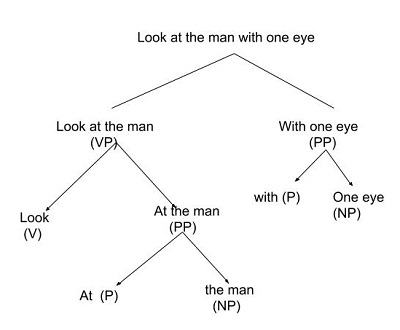

                                    Bottom-up Parsed Tree

Look at the man who has one eye

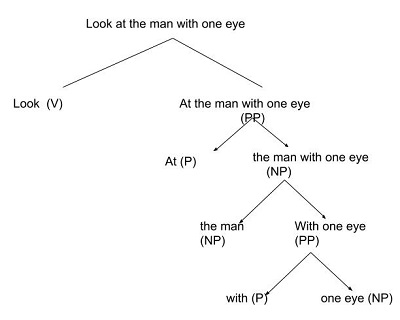

                                    Bottom-up Parsed Tree-2

Similarly, in the previous segment, you had built two parse trees for another ambiguous sentence - "the man caught fish with a net". 

 

In general, since natural languages are inherently ambiguous (at least for computers to understand), there are often cases where multiple parse trees are possible. In such cases, we need a way to make the algorithms figure out the most likely parse tree.

 

Prof. Baba will demonstrate a few more examples to explain ambiguities in sentences and techniques to solve them.

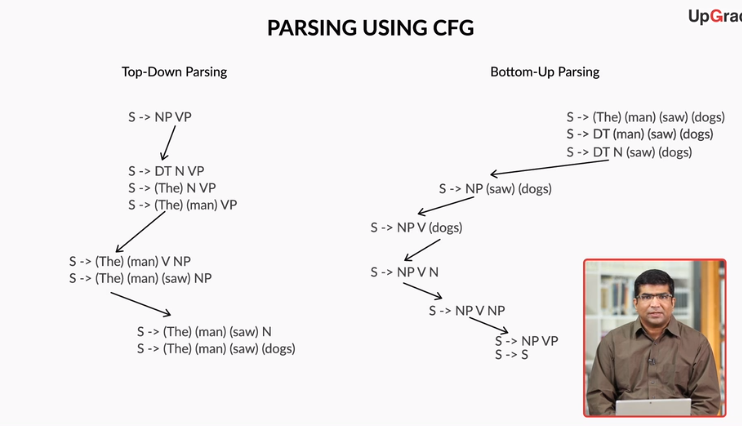

Ambiguity in a sentence

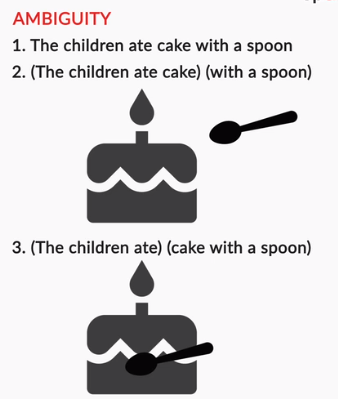

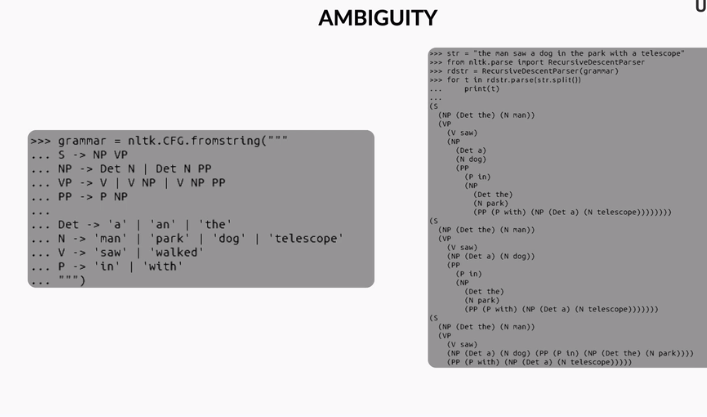

3 Different meanings of the same sentence

1. 
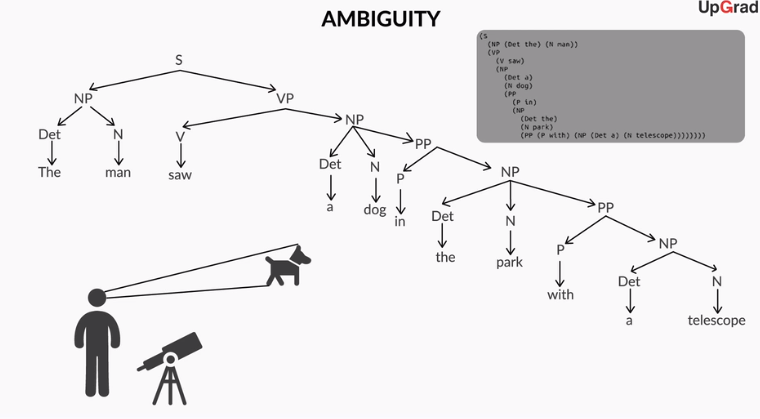

2. 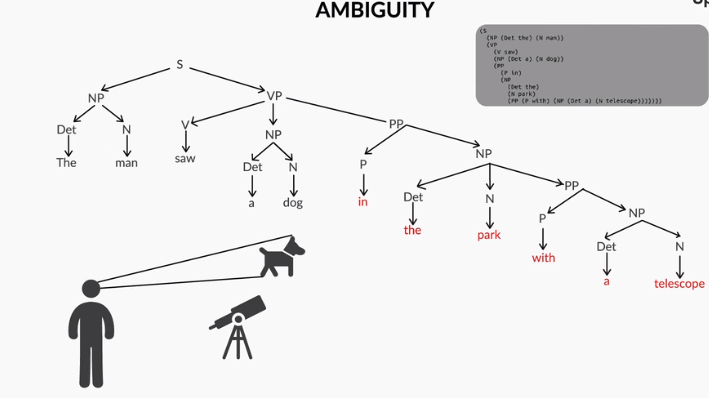

3. 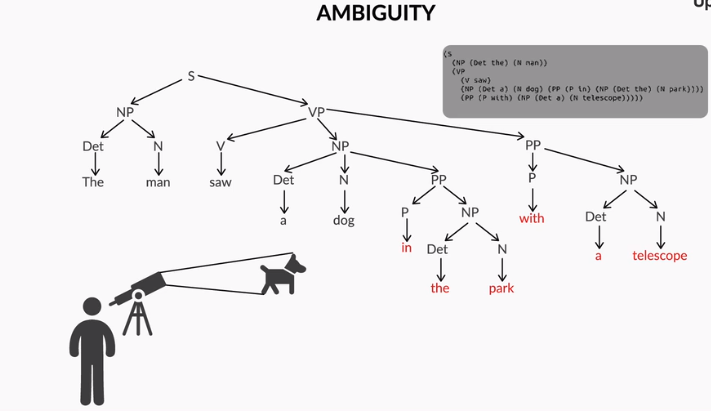

All 3 are syntactically valid

You saw examples of sentences where ambiguities lead to multiple parse trees. Note that both top-down and bottom-up techniques will generate multiple parse trees. None of these trees is grammatically incorrect, but some of these are improbable to occur in normal conversations.  To identify which of these trees is the most probable, we use the notion of probability.

 

Probabilistic Context-Free Grammars (PCFGs) are used when we want to find the most probable parsed structure of the sentence. PCFGs are grammar rules, similar to what you have seen, along with probabilities associated with each production rule. For example, an example production rule is as follows:

 

NP -> Det N (0.5) | N (0.3) |N PP (0.2)

 

It means that the probability of an NP breaking down to a ‘Det N’ is 0.50, to an 'N' is 0.30 and to an ‘N PP’ is 0.20. Note that the sum of probabilities is 1.00.

 

In the following lecture, Prof. Baba explains the concept of PCFG in detail.

In PCFG  each production rule is associated with a probability such that probabilities of all rules add up to 1

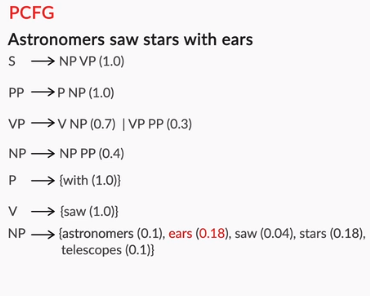



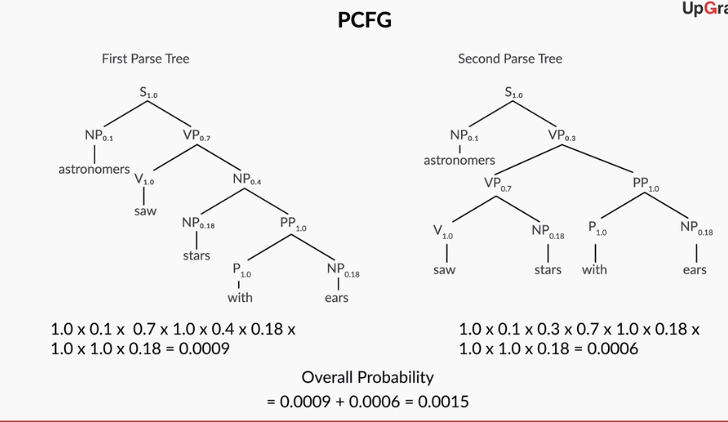

What is overall probability ..?

1. 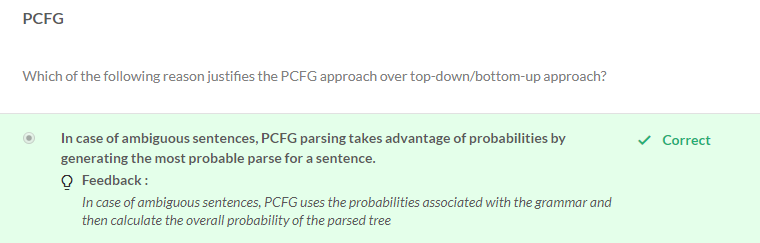

2. 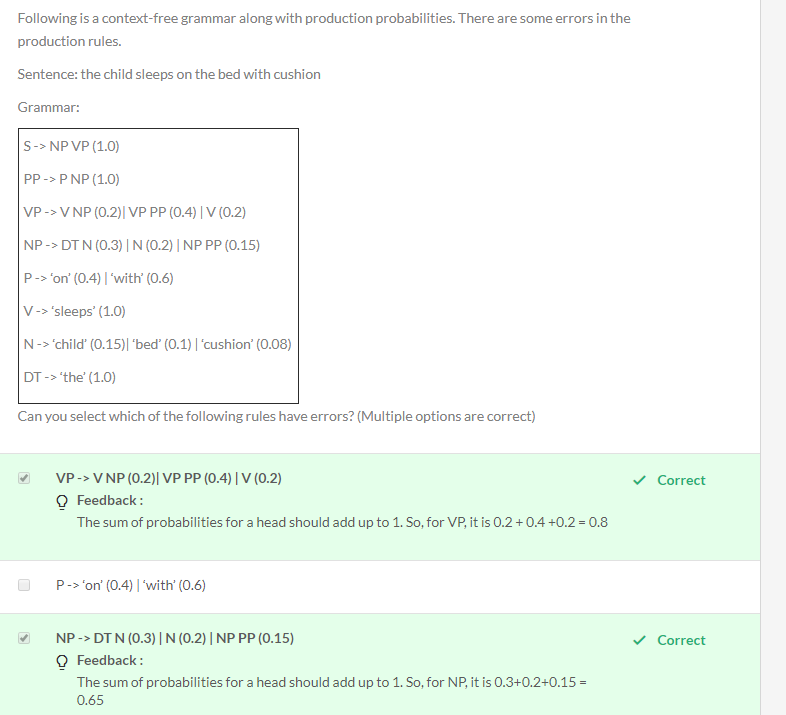

3. 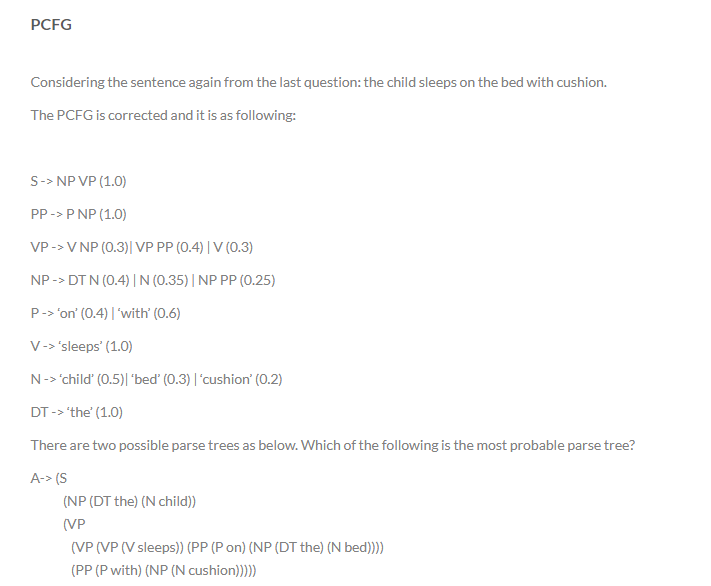

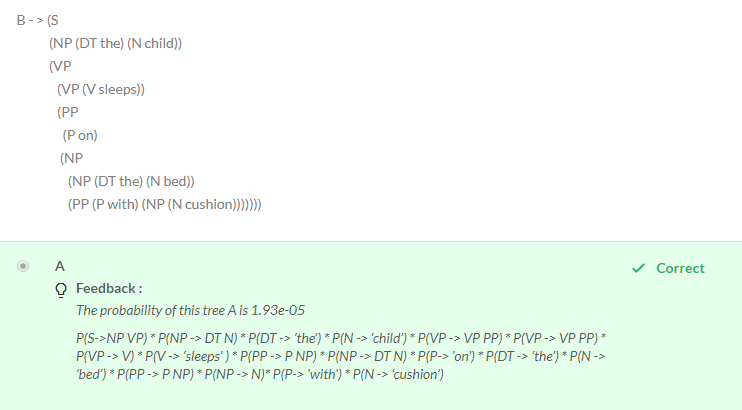

In [1]:
import nltk

In [2]:
#define the grammar for pcfg
'''
pcfg_grammar = nltk.PCFG.fromstring("""
    S -> NP VP [1.0] 
    PP -> P NP [1.0]
    VP -> V NP [0.7] | VP PP [0.3] 
    NP -> NP PP [0.4] 
    P -> 'with' [1.0]
    V -> 'saw' [1.0]
    NP -> 'astronomers' [0.1] | 'ears' [0.18] | 'saw' [0.04] | 'stars' [0.18] | 'telescopes' [0.1]
    """)

pcfg_grammar = nltk.PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> Det N [0.7] | Det N PP [0.3]
    VP -> V [0.4] | V NP [0.4] |V NP PP [0.2]
    PP -> P NP [1.0]
    Det -> 'a' [0.4]| 'the' [0.6]
    N -> 'man' [0.5] | 'dog'  [0.3]| 'park' [0.1]| 'telescope' [0.1]
    V -> 'saw' [1.0]
    P -> 'with' [0.6]| 'in' [0.4]
""")
'''
pcfg_grammar = nltk.PCFG.fromstring("""
S -> NP VP [1.0]
PP -> P NP [1.0]
VP -> V NP [0.3]| VP PP [0.4] | V [0.3]
NP -> DT N [0.4] | N [0.2] | NP PP [0.25] | N V [0.15]
P -> 'until' [0.4] | 'with' [0.6]
V -> 'chased' [0.4] | 'stumbled' [0.2] | 'fell' [0.4]
N -> 'lion' [0.5]| 'deer' [0.4] | 'it' [0.1]
DT -> 'the' [1.0]
""")

In [3]:
str = "astronomers saw stars with ears"

str = "the man saw a dog in the park with a telescope"

str = "the lion chased the deer until it fell"

In [4]:
from nltk.parse import pchart

parser = pchart.InsideChartParser(pcfg_grammar)

#print all possible trees, showing probability of each parse
for t in parser.parse(str.split()):
     print(t)

(S
  (NP (DT the) (N lion))
  (VP
    (VP (V chased) (NP (DT the) (N deer)))
    (PP (P until) (NP (N it) (V fell))))) (p=3.6864e-06)
(S
  (NP (DT the) (N lion))
  (VP
    (V chased)
    (NP
      (NP (DT the) (N deer))
      (PP (P until) (NP (N it) (V fell)))))) (p=2.304e-06)


1. 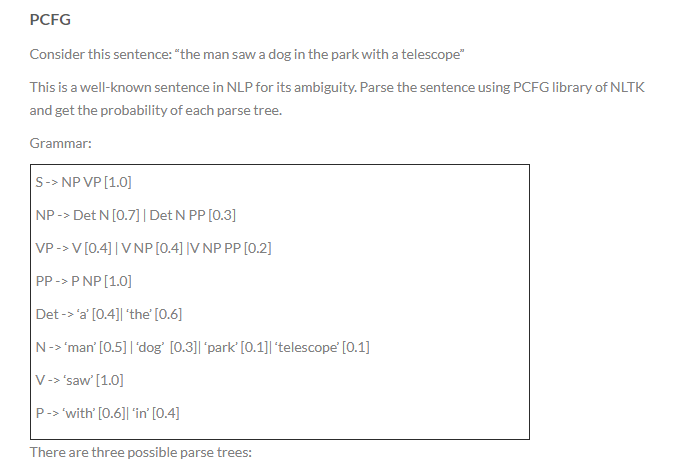

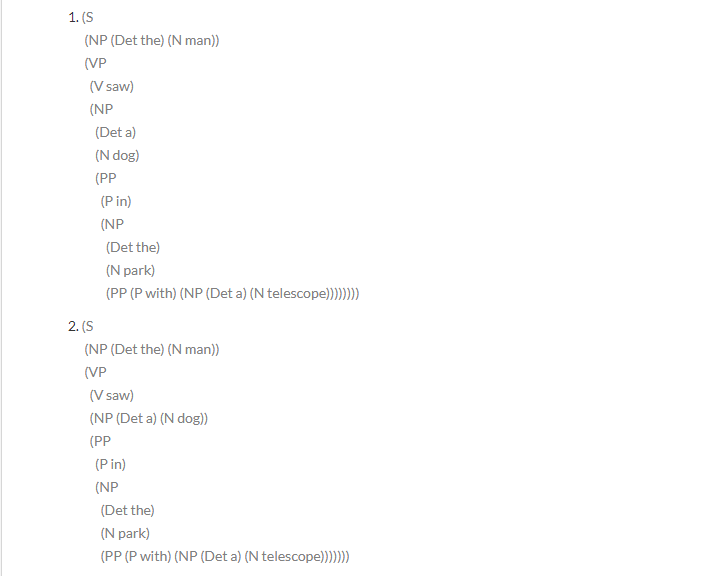

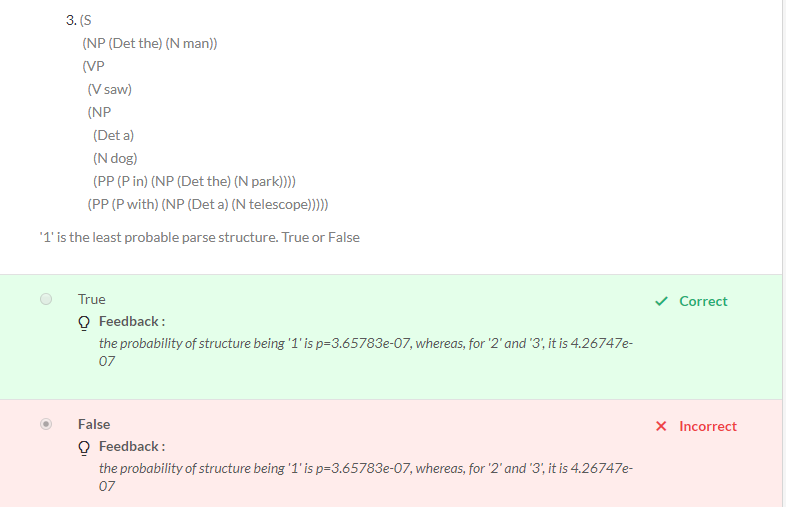

You studied the idea of CFGs and PCFGs and how to build PCFG-based parse trees using NLTK . Apart from what we have covered, there are a few other non-trivial problems to address in PCFGs, one being that of computing the probabilities of production rules. 

 

The solution is to learn these probabilities from some pre-tagged corpus where a large number of sentences have been parsed manually. Having access to such a corpus (such as the Penn Treebank), one can compute the probabilities by counting the frequencies of production rules. This is similar to how we computed the transition and emission probabilities in HMMs.

 

A detailed study of PCFGs is beyond the scope of this course, though you are encouraged to refer to the additional resources provided below.

 

Next, you will study the Chomsky Normal Form.

Additional Resources
For a further detailed study of PCFGs, refer to chapter 12, Statistical Parsing,(https://web.stanford.edu/~jurafsky/slp3/12.pdf)of the book 'Speech and Language Processing, Daniel Jurafsky & James H. Martin'.